# MACD

* MACD is a lagging indicator when trading on the crossovers

### Calculation (12-26-9 MACD (default))

* MACD=12-Period EMA − 26-Period EMA
* Singal line 9-Perioed EMA of MACD

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [10]:
data = pd.read_csv('BJ-2.csv', index_col=0, parse_dates=True)

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-06,66.000000,68.654999,65.230003,68.290001,68.290001,1972100
2021-12-07,68.870003,69.940002,67.459999,68.070000,68.070000,1124900
2021-12-08,68.269997,68.912003,65.500000,66.000000,66.000000,1165000
2021-12-09,66.169998,67.134003,65.589996,65.599998,65.599998,1081300
2021-12-10,65.370003,67.779999,65.320000,67.410004,67.410004,1008900


In [19]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [23]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signnal Line,Signal Line
Date,,,,,,,,,
2022-11-28,73.199997,75.180000,73.059998,74.559998,74.559998,1430200,-0.286581,0.186683,0.186683
2022-11-29,74.139999,76.150002,74.135002,75.169998,75.169998,1424800,-0.230846,0.103177,0.103177
2022-11-30,74.730003,75.250000,73.730003,75.239998,75.239998,1789900,-0.178965,0.046749,0.046749
2022-12-01,73.519997,73.610001,69.500000,70.730003,70.730003,3666900,-0.496050,-0.061811,-0.061811
2022-12-02,70.889999,71.910004,70.230003,70.809998,70.809998,1953300,-0.732443,-0.195937,-0.195937


<IPython.core.display.Javascript object>


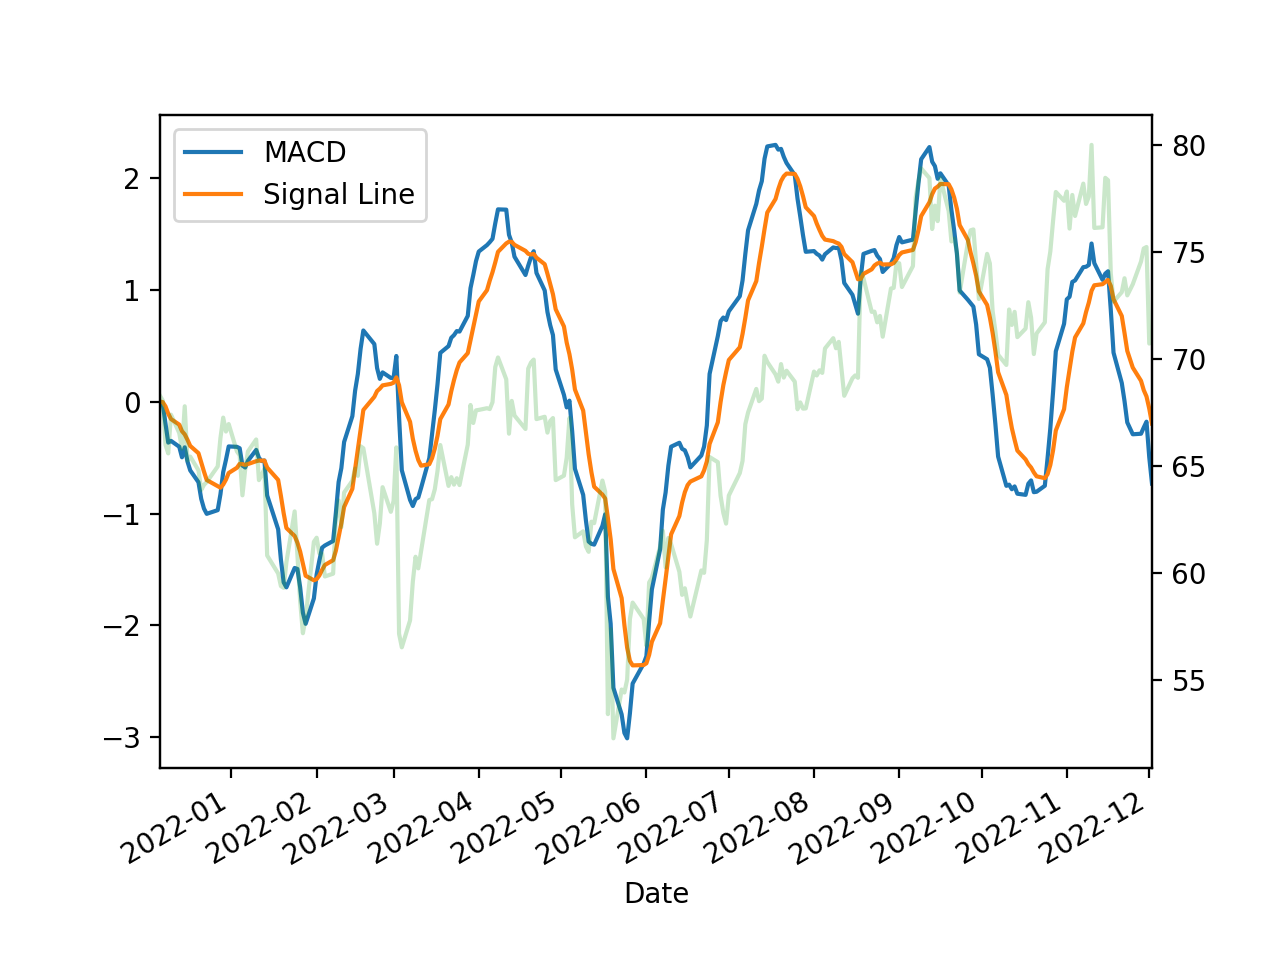

In [25]:
fig, ax = plt.subplots()
data[['MACD', 'Signal Line']].plot(ax=ax)
data['Close'].plot(ax=ax, alpha=0.25, secondary_y=True)

# Stochastic oscillator

* Lagging indicator

### Calculations

* 14-high: Maximum of last 14 trading days
* 14-low: Minimum of last 14 trading days
* %K: (Last close - 14-low)*100 / (14-high - 14-low)
* %D: Simple Moving Average of %K

In [27]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14)*100/(high14-low14)
data['%D'] = data['%K'].rolling(3).mean()

In [28]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signnal Line,Signal Line,%K,%D
Date,,,,,,,,,,,
2022-11-28,73.199997,75.180000,73.059998,74.559998,74.559998,1430200,-0.286581,0.186683,0.186683,34.636841,24.804470
2022-11-29,74.139999,76.150002,74.135002,75.169998,75.169998,1424800,-0.230846,0.103177,0.103177,41.452480,32.960872
2022-11-30,74.730003,75.250000,73.730003,75.239998,75.239998,1789900,-0.178965,0.046749,0.046749,42.234602,39.441308
2022-12-01,73.519997,73.610001,69.500000,70.730003,70.730003,3666900,-0.496050,-0.061811,-0.061811,11.274084,31.653722
2022-12-02,70.889999,71.910004,70.230003,70.809998,70.809998,1953300,-0.732443,-0.195937,-0.195937,13.259093,22.255926


In [42]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2022-11-01':].plot(ax=ax)
ax.axhline(80, c='r', alpha=0.3)
ax.axhline(20, c='r', alpha=0.3)
data['Close'].loc['2022-11-01':].plot(ax=ax, alpha=0.3, secondary_y=True)

<IPython.core.display.Javascript object>

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units